In [1]:
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
mpl.rcParams["font.family"] = 'Arial'  #默认字体类型
mpl.rcParams["mathtext.fontset"] = 'cm' #数学文字字体
mpl.rcParams["contour.negative_linestyle"] = 'dashed'  #默认字体类型
import matplotlib.pyplot as plt
import os
from netCDF4 import Dataset
import seaborn as sns
# 新增
from scipy.cluster.hierarchy import dendrogram, linkage

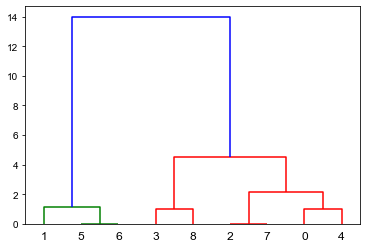

In [9]:
X = [[i] for i in [2, 8, 0, 4, 1, 9, 9, 0, 3]]
Z = linkage(X, method='ward',  metric='euclidean')

dn = dendrogram(Z)

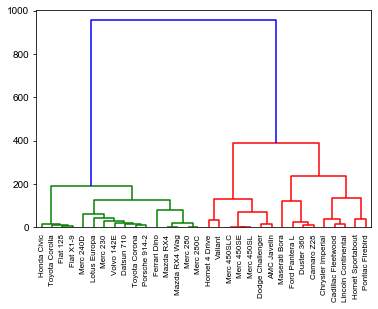

In [22]:
data_cars=pd.read_csv('Data/mtcars/mtcars.csv')
df = data_cars.set_index('model')
del df.index.name
models=df.index
Z = linkage(df.values, method='ward',  metric='euclidean')
plt.figure()
ax=plt.gca()
dn = dendrogram(Z, orientation='top', ax=ax)
leaves=np.array(dn['leaves'],dtype=int)
ax.xaxis.set_ticklabels(models[leaves],rotation=90)
# print(dn)
plt.show()

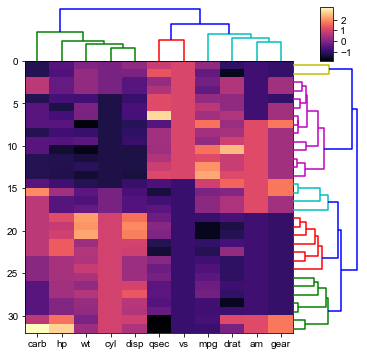

In [49]:
data_cars=pd.read_csv('Data/mtcars/mtcars.csv')
df = data_cars.set_index('model')
del df.index.name
models=df.index

clustermap=sns.clustermap(df, z_score=1,cmap='magma')  #dendrogram_row.linkage
clusterdata=clustermap.data2d
plt.close()

models=clusterdata.index
names=clusterdata.columns
values=np.array(clusterdata.values,dtype=float)


fig,axs=plt.subplots(2,2,gridspec_kw={'width_ratios':[1,0.25], 'height_ratios':[0.2,1],
                                      'hspace':0,'wspace':0},figsize=(6,6))
ax=axs[1][0]
x = np.arange(values.shape[1] + 1)
y = np.arange(values.shape[0] + 1)
heatmap=ax.pcolor(values,cmap='magma')
ax.set_xticks(x[:-1]+0.5)
ax.set_xticklabels(names)
ax.invert_yaxis()

ax=axs[0][0]
linkage_col=clustermap.dendrogram_col.linkage
dendrogram(linkage_col, ax=ax)
ax.axis('off')

ax=axs[1][1]
linkage_row=clustermap.dendrogram_row.linkage
dendrogram(linkage_row, ax=ax, orientation='right')
ax.axis('off')

ax=axs[0][1]
w_cb=0.2
ax_cb=ax.inset_axes([0.5-w_cb/2.0, 0, w_cb, 1], transform=ax.transAxes)
cbar = plt.colorbar(heatmap, cax=ax_cb, ticks=np.arange(-3,3))
ax.axis('off')
plt.show()